In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

The data was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) and then cleaned for analysis. The principal investigators responsible for data collection were:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

- age: age in years
- sex: 1=male, 0=female
- cp: chest pain type
 - Value 1: typical angina
 - Value 2: atypical angina
 - Value 3: non-anginal pain
 - Value 4: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved in an exercise test
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
 - Value 1: upsloping
 - Value 2: flat
 - Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 
 - Value 3: normal
 - Value 6: fixed defect
 - Value 7: reversable defect
- heart_disease: diagnosis of heart disease (angiographic disease status)
 - Value 0: < 50% diameter narrowing
 - Value 1: > 50% diameter narrowing
"\[This field\] refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)."

In [2]:
heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


## Two-sample t-test for trestbps

In [3]:
heart.groupby('heart_disease').mean()

,age,trestbps,chol,exang,fbs,thalach
heart_disease,,,,,,
absence,52.585366,129.250000,242.640244,0.140244,0.140244,158.378049
presence,56.625899,134.568345,251.474820,0.546763,0.158273,139.258993


<AxesSubplot:xlabel='heart_disease', ylabel='trestbps'>

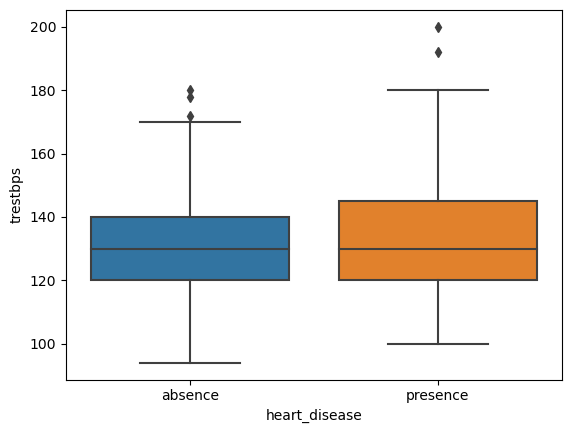

In [5]:
sns.boxplot(x=heart.heart_disease, y = heart.trestbps) # resting blood pressure (in mm Hg on admission to the hospital)

Null: There is no difference in mean resting blood pressure for patients with and without heart disease

Alternative: There is difference in mean resting blood pressure for patients with and without heart disease

In [30]:
# two-sample t-test

from scipy.stats import ttest_ind
tstat, pval = ttest_ind(trestbps_hd, trestbps_no_hd) # compare people with and without heart disease
print(pval)

0.008548268928594928


Conclusion: we should reject Null. There seems to be a difference in mean resting blood pressure for patients with and without heart disease

# two-sample t-test for talach

thalach: maximum heart rate achieved in an exercise test
    
Null: There is no difference in mean maximum heart rate achievede for patients with and without heart disease

Alternative: There is difference in mean maximum heart rate achieved for patients with and without heart disease

<AxesSubplot:xlabel='heart_disease', ylabel='thalach'>

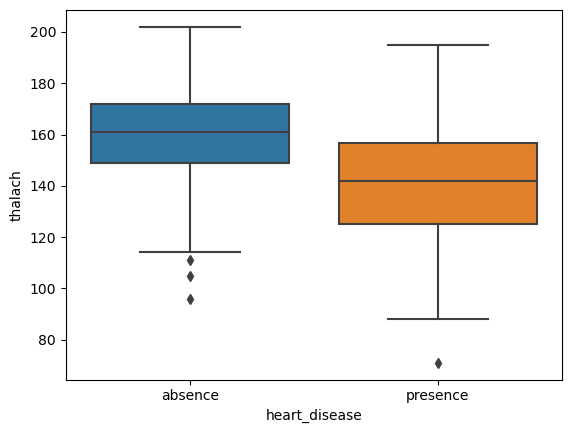

In [32]:
sns.boxplot(x=heart.heart_disease, y = heart.thalach) # maximum heart rate achieved in an exercise test

In [47]:
# two-sample t-test
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd) # compare people with and without heart disease
print(pval)

3.456964908430172e-14


Conclusion: p-value confirms what we see -- there is a difference, Null should be rejected.

# two-sample t-test for age

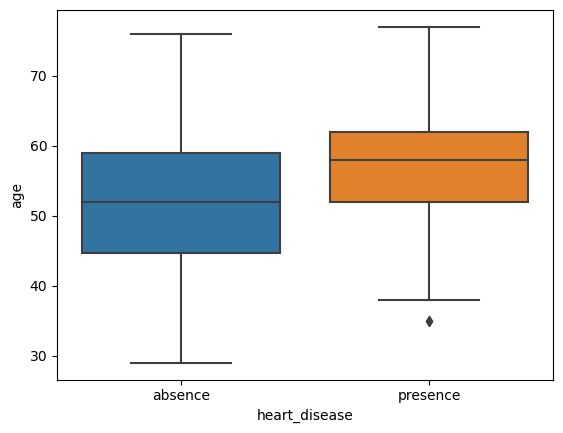

In [48]:
sns.boxplot(x=heart.heart_disease, y=heart.age)
plt.show()

Null: age doesn't influence the presense of a disease
    
Alternative: there is an association between the age an dthe presence of a disease

In [50]:
age_hd = heart.age[heart.heart_disease == 'presence']
age_no_hd = heart.age[heart.heart_disease == 'absence']

tstat, pval = ttest_ind(age_hd, age_no_hd)
print(pval)

8.955636917529706e-05


Conclusion: we should reject Null, there is an association between age and the presence of the disease

# two-sample t-test for chol

Null: there is no association between cholesterol level and the presence of a disease
    
Alternative: there is an association cholesterol level and the presence of a disease

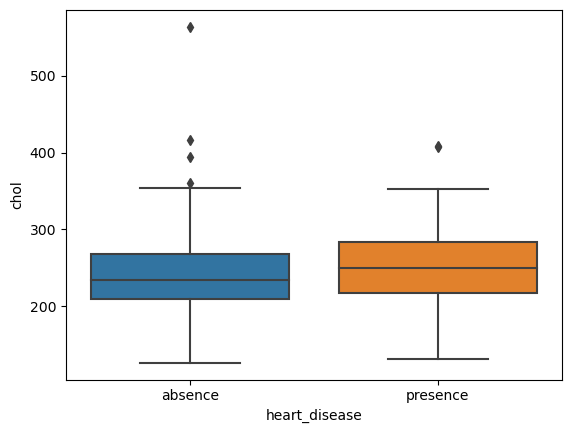

In [52]:
sns.boxplot(x=heart.heart_disease, y=heart.chol)
plt.show()

In [53]:
chol_hd = heart.chol[heart.heart_disease == 'presence']
chol_no_hd = heart.chol[heart.heart_disease == 'absence']
tstat, pval = ttest_ind(chol_hd, chol_no_hd)
print(pval)

0.13914167020436527


Conclusion: we fail to reject Null,the difference in cholesterol level in people with and without a disease isn't statistically significant.

# ANOVA test for cp and thalach

cp: chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
    
thalach: maximum heart rate achieved in an exercise test

Null: there is no association between chest pain type and maximum heart rate achieved in an exercise test
    
Alternative: there is association between chest pain type and maximum heart rate achieved in an exercise test

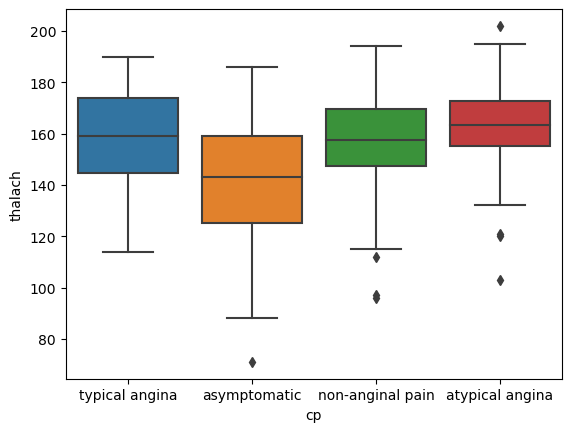

In [6]:
sns.boxplot(x=heart.cp, y=heart.thalach) 
plt.show()

In [4]:
from scipy.stats import f_oneway


typ_angina = heart.thalach[heart.cp == 'typical angina']
atyp_angina = heart.thalach[heart.cp == 'atypical angina']
non_angina = heart.thalach[heart.cp == 'non-anginal pain']
asymp_angina = heart.thalach[heart.cp == 'asymptomatic']

fstat, pval = f_oneway(typ_angina, atyp_angina, non_angina, asymp_angina)
print(pval)

1.9065505247705008e-10


In [3]:
heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


Conclusion: we should reject Null, and explore further with Tukey's test.

## Tukey test for cp and thalach

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# put quant. var. first

tukey_results = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05) # 0.05 is significance level
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


Conclusion: there is significant difference between asymptomatic group and any other group.

## Chi-Square Test for thalach and cp

In [14]:
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


cp: chest pain type Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic


Null: there is no association between chest pain type and presence of the disease

Alternative: there is association between chest pain type and presence of the disease

In [15]:
from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency(Xtab)
print(pval)

1.2517106007837527e-17


Conclusion: we should reject Null value and conclude that there is association between chest pain type and presence of the disease

## Chi-Square Test for sex and heart_disease

In [19]:
X_tab = pd.crosstab(heart.sex, heart.heart_disease)
X_tab

heart_disease,absence,presence
sex,,
female,72,25
male,92,114


Null: there is no association between sex and presence of the disease

Alternative: there is association between sex and presence of the disease

In [20]:
chi2, pval, ddof, expected = chi2_contingency(X_tab)
print(pval)

2.666712348180942e-06


Conclusion: we should reject Null; there is association between sex and the presense of the desease.